In [1]:
from keras.layers import SimpleRNN, Embedding, Dense, LSTM
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

Using TensorFlow backend.


In [2]:
  data = pd.read_csv("SPAM text message 20170820 - Data.csv")

In [3]:
texts = []
labels = []
for i, label in enumerate(data['Category']):
    texts.append(data['Message'][i])
    if label == 'ham':
        labels.append(0)
    else:
        labels.append(1)

texts = np.asarray(texts)
labels = np.asarray(labels)


print("number of texts :" , len(texts))
print("number of labels: ", len(labels))

number of texts : 5572
number of labels:  5572


In [4]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# number of words used as features
max_features = 10000
# cut off the words after seeing 500 words in each document(email)
maxlen = 500


# we will use 80% of data as training, 20% as validation data
training_samples = int(5572 * .8)
validation_samples = int(5572 - training_samples)
# sanity check
print(len(texts) == (training_samples + validation_samples))
print("The number of training {0}, validation {1} ".format(training_samples, validation_samples))

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts) 
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print("Found {0} unique words: ".format(len(word_index)))

data = pad_sequences(sequences, maxlen=maxlen)

print("data shape: ", data.shape)

np.random.seed(42)
# shuffle data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]


texts_train = data[:training_samples]
y_train = labels[:training_samples]
texts_test = data[training_samples:]
y_test = labels[training_samples:]

True
The number of training 4457, validation 1115 
Found 9004 unique words: 
data shape:  (5572, 500)


In [5]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_rnn = model.fit(texts_train, y_train, epochs=10, batch_size=60, validation_split=0.2)

Epoch 1/10
60/60 [==============================] - 5s 90ms/step - loss: 0.4141 - acc: 0.8454 - val_loss: 0.4704 - val_acc: 0.8857
Epoch 2/10
60/60 [==============================] - 5s 83ms/step - loss: 0.2650 - acc: 0.9456 - val_loss: 0.1420 - val_acc: 0.9664
Epoch 3/10
60/60 [==============================] - 5s 83ms/step - loss: 0.0864 - acc: 0.9823 - val_loss: 0.1455 - val_acc: 0.9518
Epoch 4/10
60/60 [==============================] - 5s 83ms/step - loss: 0.0419 - acc: 0.9905 - val_loss: 0.0840 - val_acc: 0.9697
Epoch 5/10
60/60 [==============================] - 5s 82ms/step - loss: 0.0270 - acc: 0.9930 - val_loss: 0.0661 - val_acc: 0.9787
Epoch 6/10
60/60 [==============================] - 5s 83ms/step - loss: 0.0157 - acc: 0.9958 - val_loss: 0.0501 - val_acc: 0.9843
Epoch 7/10
60/60 [==============================] - 5s 83ms/step - loss: 0.0340 - acc: 0.9854 - val_loss: 0.0700 - val_acc: 0.9821
Epoch 8/10
60/60 [==============================] - 5s 82ms/step - loss: 0.0172 - a

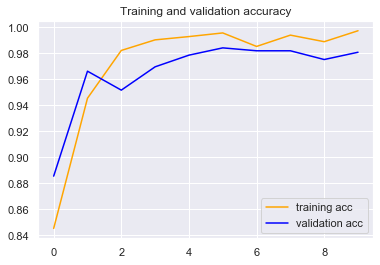

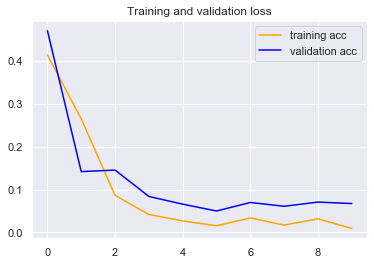

In [6]:
acc = history_rnn.history['acc']
val_acc = history_rnn.history['val_acc']
loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training acc')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [7]:
pred = model.predict_classes(texts_test)
acc = model.evaluate(texts_test, y_test)
proba_rnn = model.predict_proba(texts_test)
from sklearn.metrics import confusion_matrix
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))
print(confusion_matrix(pred, y_test))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
35/35 [==============================] - 0s 14ms/step - loss: 0.0722 - acc: 0.9803
Instructions for updating:
Please use `model.predict()` instead.
Test loss is 0.07 accuracy is 0.98  
[[958  19]
 [  3 135]]


In [ ]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_ltsm = model.fit(texts_train, y_train, epochs=10, batch_size=60, validation_split=0.2)

Epoch 1/10
60/60 [==============================] - 9s 156ms/step - loss: 0.3064 - acc: 0.8785 - val_loss: 0.1497 - val_acc: 0.9529
Epoch 2/10
60/60 [==============================] - 9s 147ms/step - loss: 0.1048 - acc: 0.9778 - val_loss: 0.0711 - val_acc: 0.9854
Epoch 3/10
60/60 [==============================] - 10s 163ms/step - loss: 0.0532 - acc: 0.9893 - val_loss: 0.0462 - val_acc: 0.9865
Epoch 4/10
60/60 [==============================] - 12s 201ms/step - loss: 0.0303 - acc: 0.9933 - val_loss: 0.0452 - val_acc: 0.9843
Epoch 5/10
27/60 [============>.................] - ETA: 5s - loss: 0.0206 - acc: 0.9963

In [ ]:
acc = history_ltsm.history['acc']
val_acc = history_ltsm.history['val_acc']
loss = history_ltsm.history['loss']
val_loss = history_ltsm.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training acc')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
pred = model.predict_classes(texts_test)
acc = model.evaluate(texts_test, y_test)
proba_ltsm = model.predict_proba(texts_test)
from sklearn.metrics import confusion_matrix
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))
print(confusion_matrix(pred, y_test))